In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 32


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6*batch_size,(3,3),activation = "selu", input_shape = (224,224,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(4*batch_size,(3,3),activation = "selu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(4*batch_size,(3,3),activation = "selu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(2*batch_size,(3,3),activation = "selu") ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.2,seed = 2),
    tf.keras.layers.Dense(8*batch_size,activation ="selu"),
    tf.keras.layers.Dense(6*batch_size,activation ="selu"),
    tf.keras.layers.Dense(4*batch_size,activation ="selu"),
    tf.keras.layers.Dense(3,activation = "softmax")    #Adding the Output Layer
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 192)     5376      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 192)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     221312    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=SGD(lr=0.01)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
bs=21
bstest=6        #Setting batch size
train_dir = "/content/drive/MyDrive/DL_ZC/ZC_seperated/ZCTraining_Seperated/"   #Setting training directory

validation_dir = "/content/drive/MyDrive/DL_ZC/ZC_seperated/ZCTesting_Seperated/"   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 21 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(224,224))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bstest,
                                                         class_mode  = 'categorical',
                                                         target_size=(224,224))

Found 1200 images belonging to 3 classes.
Found 480 images belonging to 3 classes.


In [ ]:
label_map = (validation_generator.class_indices)
label_map

{'Foot': 0, 'Head': 1, 'Web': 2}

In [ ]:
callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', min_delta=10)

Epoch 1/100
7/7 - 61s - loss: 15.3469 - acc: 0.3566 - val_loss: 2.2765 - val_acc: 0.3333 - 61s/epoch - 9s/step
Epoch 2/100
7/7 - 58s - loss: 8.5234 - acc: 0.2857 - val_loss: 9.0479 - val_acc: 0.2222 - 58s/epoch - 8s/step
Epoch 3/100
7/7 - 56s - loss: 11.2044 - acc: 0.3537 - val_loss: 5.6460 - val_acc: 0.2222 - 56s/epoch - 8s/step
Epoch 4/100
7/7 - 44s - loss: 5.3266 - acc: 0.3810 - val_loss: 1.9793 - val_acc: 0.3889 - 44s/epoch - 6s/step
Epoch 5/100
7/7 - 46s - loss: 2.0994 - acc: 0.3605 - val_loss: 0.8868 - val_acc: 0.6111 - 46s/epoch - 7s/step
Epoch 6/100
7/7 - 39s - loss: 1.9019 - acc: 0.4354 - val_loss: 3.4979 - val_acc: 0.2778 - 39s/epoch - 6s/step
Epoch 7/100
7/7 - 27s - loss: 1.5138 - acc: 0.4762 - val_loss: 2.6151 - val_acc: 0.3333 - 27s/epoch - 4s/step
Epoch 8/100
7/7 - 31s - loss: 1.7402 - acc: 0.4830 - val_loss: 1.6434 - val_acc: 0.4444 - 31s/epoch - 4s/step
Epoch 9/100
7/7 - 25s - loss: 0.8371 - acc: 0.6871 - val_loss: 1.7455 - val_acc: 0.3333 - 25s/epoch - 4s/step
Epoch 10

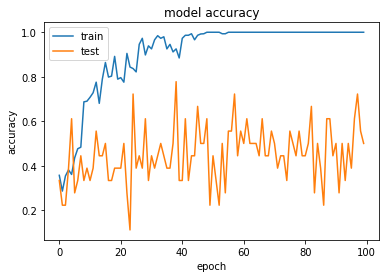

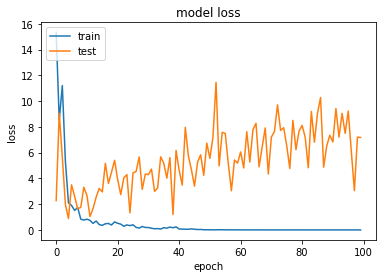

In [ ]:

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=100,
                    validation_steps=18 // bstest,
                    #callbacks=[callbacks],
                    verbose=2)

print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(validation_generator, verbose=10)
scores

[7.839909553527832, 0.4541666805744171]

In [ ]:
bs=21
bstest=6        #Setting batch size
validation_dir1 = "/content/drive/MyDrive/DL_ZC/ZCtestinrandom/"   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
#train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen1  = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 21 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
#train_generator1=train_datagen1.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(224,224))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator1 =  test_datagen1.flow_from_directory(validation_dir1,
                                                         batch_size=bstest,
                                                         class_mode  = 'categorical',
                                                         target_size=(224,224))

Found 696 images belonging to 3 classes.


In [ ]:
scores = model.evaluate(validation_generator1, verbose=10)
scores

[2.2671581518807216e-06, 1.0]

In [ ]:
model.save("ZC_100_Selu_max3dense.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from tensorflow.keras.preprocessing import image

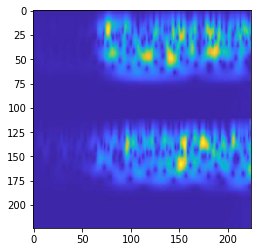

In [ ]:

img_path = "/content/drive/MyDrive/DL_ZC/Inputexp/100kn.jpg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [ ]:
predict_x=model.predict(img_batch)
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
predict_x

array([[0., 1., 0.]], dtype=float32)

In [ ]:
classes_x

array([1])